In [1]:
import numpy as np
import pandas as pd
import GPy
import pymc3 as pm
from theano import tensor as tt
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from data.get_results import get_results
from likelihood import get_kernel
from acquisitions import local_acq1, generate1, log_likelihood, get_likelihood_utility

 E:\Program_Files\Anaconda\envs\testpymc3\lib\site-packages\h5py\__init__.py:36: FutureWarning:Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.


In [2]:
results = get_results('data/results.json').iloc[3:]
function_names = results['function_name'].unique()
kernel_dict = {f: get_kernel(results, GPy.kern.RBF(1), f) for f in function_names}
functions_dict = results[['function_name', 'function']].drop_duplicates(subset = ['function_name']).set_index('function_name').to_dict()['function']
normalized_functions_dict = {f: np.array(functions_dict[f]) / np.std(functions_dict[f]) for f in function_names}

## Simulate actions with negative quadratic reward

In [3]:
neg_quad = normalized_functions_dict['neg_quad']
neg_quad_kern = kernel_dict['neg_quad']
fmax = np.argmax(neg_quad)

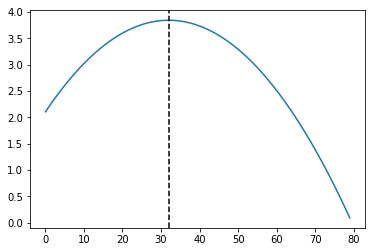

In [4]:
plt.plot(neg_quad);
plt.axvline(x=fmax, ls='--', c='black');

## Strategies

In [5]:
learning_rate_params = np.array([0, 350, 350])
stay_penalty_params = np.array([10, 0, 10])
temp_params = np.array([.1, .1, .1])

In [6]:
true_params = {'learning_rate': learning_rate_params,
                   'stay_penalty': stay_penalty_params,
                   'temperature': temp_params}

In [7]:
data = generate1(local_acq1, true_params, neg_quad_kern, neg_quad, 30, 20, 3, np.array([.333, .333, .333]))

In [13]:
actions = data[:,9,:].argmax(axis=1)

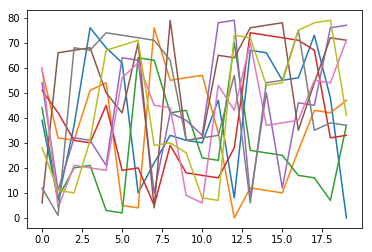

In [14]:
plt.plot(actions[:9].T);

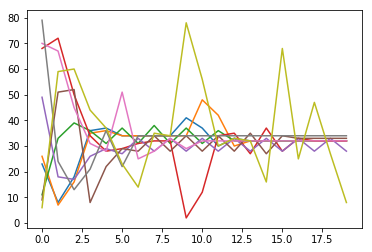

In [15]:
plt.plot(actions[10:19].T);

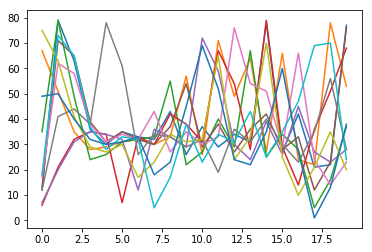

In [16]:
plt.plot(actions[19:].T);